# Open data to map

Open data of coordinates of parking meters in Brno.

## Import

In [45]:
import pandas as pd
import requests
import json
import geopandas as gpd
import contextily as cx
import plotly.express as px

## Conservative approach

Getting data from API with requests library and creating pandas dataframe.

In [55]:
response = requests.get('https://opendata.arcgis.com/datasets/0216e71bdea143758135224c7cdb52b4_0.geojson')
data = response.json()

geo = []
for i in data["features"]:
  geo.append(i['geometry']['coordinates'])
df = pd.DataFrame(geo, columns=['longitude', 'latitude'])
print(df)

     longitude   latitude
0    16.613473  49.201775
1    16.612243  49.196687
2    16.610825  49.201604
3    16.612223  49.202482
4    16.597833  49.199677
..         ...        ...
123  16.627328  49.222725
124  16.588280  49.198898
125  16.590995  49.199096
126  16.593359  49.198364
127  16.592717  49.200310

[128 rows x 2 columns]


Visualization with library plotly.

In [47]:
fig = px.scatter_mapbox(df, lon="longitude", lat="latitude",
                   size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

## Geopandas approach

Using library geopandas to get data from API and to visualize point on map.

In [48]:
gpdf = gpd.read_file('https://opendata.arcgis.com/datasets/0216e71bdea143758135224c7cdb52b4_0.geojson')
print(gpdf['geometry'])

0      POINT (16.61347 49.20178)
1      POINT (16.61224 49.19669)
2      POINT (16.61083 49.20160)
3      POINT (16.61222 49.20248)
4      POINT (16.59783 49.19968)
                 ...            
123    POINT (16.62733 49.22272)
124    POINT (16.58828 49.19890)
125    POINT (16.59099 49.19910)
126    POINT (16.59336 49.19836)
127    POINT (16.59272 49.20031)
Name: geometry, Length: 128, dtype: geometry


Adding background map with library contextly.

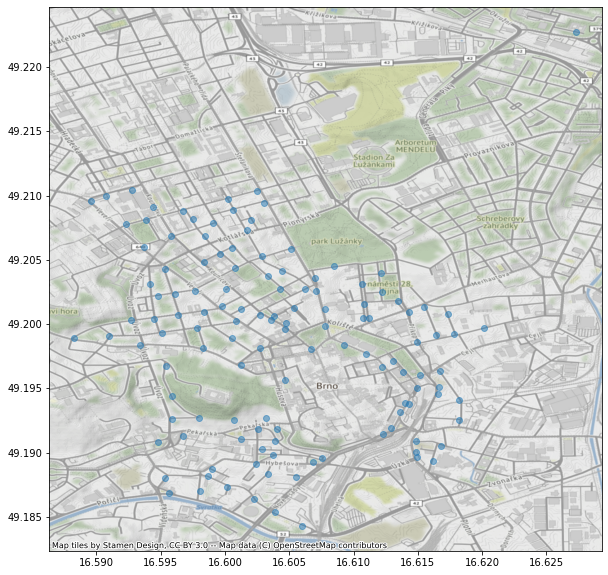

In [53]:
map = gpdf['geometry'].plot(figsize=(10, 10), alpha=0.5)
cx.add_basemap(map, crs=gpdf['geometry'].crs)